# Predicting tomato price based on the various parameters
This project is to see if there is any correlation between temperature, rainfall, previous prices and current price.
This looks like a time series setting, I found the cyclic pattern was spurious, hence I decided to go with normal regression/classification approach

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Data sources
The temp_rainfall_tomato_price_monthly_BLR.csv is a pre-processed data.

tomato prices monthly averages http://agmarknet.gov.in/ </br>

inflation (CPI) - used for calculating adjusted price https://fred.stlouisfed.org/series/INDCPIALLMINMEI </br>

temperature and rainfall data: https://www.worldweatheronline.com/lang/en-in/bangalore-weather-averages/karnataka/in.aspx

In [61]:
df_tomato_temp = pd.read_csv(r'.\data\temp_rainfall_tomato_price_monthly_BLR.csv', parse_dates=['Month']) 

In [62]:
df_tomato_temp.set_index('Month', inplace=True)

In [63]:
df_tomato_temp.drop(['CPI', 'TomatoPrice_BLR'], axis=1, inplace=True)

In [64]:
df_tomato_temp.head()

,AverageTemp,MinTemp,MaxTemp,RainfallMM,RainfallDays,PriceInflAdjusted
Month,,,,,,
2009-01-01,23,16,28,7.69,4,23.772523
2009-02-01,27,19,32,0.00,0,23.772523
2009-03-01,28,21,33,71.41,12,23.772523
2009-04-01,30,23,36,38.01,13,23.455556
2009-05-01,28,23,33,151.70,26,19.106181


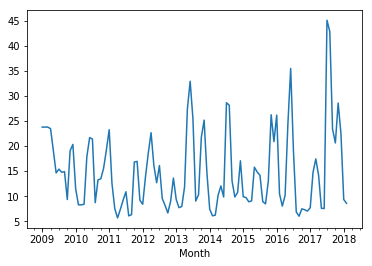

In [65]:
df_tomato_temp.PriceInflAdjusted.plot()

In [66]:
df_tomato_temp.shift(-2).head()

,AverageTemp,MinTemp,MaxTemp,RainfallMM,RainfallDays,PriceInflAdjusted
Month,,,,,,
2009-01-01,28.0,21.0,33.0,71.41,12.0,23.772523
2009-02-01,30.0,23.0,36.0,38.01,13.0,23.455556
2009-03-01,28.0,23.0,33.0,151.70,26.0,19.106181
2009-04-01,25.0,20.0,29.0,282.71,29.0,14.636727
2009-05-01,24.0,21.0,27.0,75.91,26.0,15.392708


In [67]:
df_tomato_temp.head()

,AverageTemp,MinTemp,MaxTemp,RainfallMM,RainfallDays,PriceInflAdjusted
Month,,,,,,
2009-01-01,23,16,28,7.69,4,23.772523
2009-02-01,27,19,32,0.00,0,23.772523
2009-03-01,28,21,33,71.41,12,23.772523
2009-04-01,30,23,36,38.01,13,23.455556
2009-05-01,28,23,33,151.70,26,19.106181


In [68]:
df_tomato_temp_joined = df_tomato_temp.join(df_tomato_temp.shift(-2), how='inner', rsuffix = '-2')

In [69]:
df_tomato_temp_joined = df_tomato_temp_joined.join(df_tomato_temp.shift(-3), how='inner', rsuffix = '-3')

In [72]:
df_tomato_temp_joined.columns

Index(['AverageTemp', 'MinTemp', 'MaxTemp', 'RainfallMM', 'RainfallDays',
       'PriceInflAdjusted', 'AverageTemp-2', 'MinTemp-2', 'MaxTemp-2',
       'RainfallMM-2', 'RainfallDays-2', 'PriceInflAdjusted-2',
       'AverageTemp-3', 'MinTemp-3', 'MaxTemp-3', 'RainfallMM-3',
       'RainfallDays-3', 'PriceInflAdjusted-3'],
      dtype='object')

In [73]:
df_tomato_temp_joined.corr()['PriceInflAdjusted'].abs().sort_values()

PriceInflAdjusted-2    0.008480
RainfallDays-3         0.014923
MinTemp-3              0.021126
AverageTemp-3          0.038412
RainfallDays-2         0.048277
MinTemp-2              0.063752
RainfallMM-3           0.065563
MaxTemp-3              0.065885
AverageTemp            0.079324
MinTemp                0.107852
MaxTemp                0.126817
PriceInflAdjusted-3    0.130954
AverageTemp-2          0.169665
MaxTemp-2              0.177532
RainfallMM             0.208382
RainfallMM-2           0.236135
RainfallDays           0.246767
PriceInflAdjusted      1.000000
Name: PriceInflAdjusted, dtype: float64

In [86]:
df_tomato_temp_joined['Month'] = df_tomato_temp_joined.index.month

In [76]:
df_tomato_temp_joined.head()

,AverageTemp,MinTemp,MaxTemp,RainfallMM,RainfallDays,PriceInflAdjusted,AverageTemp-2,MinTemp-2,MaxTemp-2,RainfallMM-2,RainfallDays-2,PriceInflAdjusted-2,AverageTemp-3,MinTemp-3,MaxTemp-3,RainfallMM-3,RainfallDays-3,PriceInflAdjusted-3,Month
Month,,,,,,,,,,,,,,,,,,,
2009-01-01,23,16,28,7.69,4,23.772523,28.0,21.0,33.0,71.41,12.0,23.772523,30.0,23.0,36.0,38.01,13.0,23.455556,1
2009-02-01,27,19,32,0.00,0,23.772523,30.0,23.0,36.0,38.01,13.0,23.455556,28.0,23.0,33.0,151.70,26.0,19.106181,2
2009-03-01,28,21,33,71.41,12,23.772523,28.0,23.0,33.0,151.70,26.0,19.106181,25.0,20.0,29.0,282.71,29.0,14.636727,3
2009-04-01,30,23,36,38.01,13,23.455556,25.0,20.0,29.0,282.71,29.0,14.636727,24.0,21.0,27.0,75.91,26.0,15.392708,4
2009-05-01,28,23,33,151.70,26,19.106181,24.0,21.0,27.0,75.91,26.0,15.392708,24.0,20.0,28.0,271.67,27.0,14.768313,5


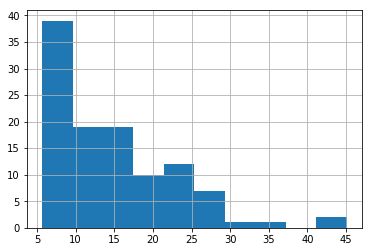

In [77]:
df_tomato_temp_joined.PriceInflAdjusted.hist()

In [18]:
#I dont want to predict based on current month temperature or rainfall as this will be useless

In [78]:
df_tomato_temp_joined.drop(['AverageTemp', 'MinTemp', 'MaxTemp', 'RainfallMM', 'RainfallDays'], axis=1, inplace=True)

In [20]:
df_tomato_temp_joined.columns

Index(['PriceInflAdjusted', 'AverageTemp-2', 'MinTemp-2', 'MaxTemp-2',
       'RainfallMM-2', 'RainfallDays-2', 'PriceInflAdjusted-2',
       'AverageTemp-3', 'MinTemp-3', 'MaxTemp-3', 'RainfallMM-3',
       'RainfallDays-3', 'PriceInflAdjusted-3', 'Month'],
      dtype='object')

In [79]:
df_tomato_temp_joined.head()

,PriceInflAdjusted,AverageTemp-2,MinTemp-2,MaxTemp-2,RainfallMM-2,RainfallDays-2,PriceInflAdjusted-2,AverageTemp-3,MinTemp-3,MaxTemp-3,RainfallMM-3,RainfallDays-3,PriceInflAdjusted-3,Month
Month,,,,,,,,,,,,,,
2009-01-01,23.772523,28.0,21.0,33.0,71.41,12.0,23.772523,30.0,23.0,36.0,38.01,13.0,23.455556,1
2009-02-01,23.772523,30.0,23.0,36.0,38.01,13.0,23.455556,28.0,23.0,33.0,151.70,26.0,19.106181,2
2009-03-01,23.772523,28.0,23.0,33.0,151.70,26.0,19.106181,25.0,20.0,29.0,282.71,29.0,14.636727,3
2009-04-01,23.455556,25.0,20.0,29.0,282.71,29.0,14.636727,24.0,21.0,27.0,75.91,26.0,15.392708,4
2009-05-01,19.106181,24.0,21.0,27.0,75.91,26.0,15.392708,24.0,20.0,28.0,271.67,27.0,14.768313,5


In [80]:
df_tomato_temp_joined['PriceRange'] = pd.cut(df_tomato_temp_joined['PriceInflAdjusted'], [0, 10, 20,100], labels=['Low', 'Medium', 'High'], )

In [81]:
df_tomato_temp_joined['PriceRange'].value_counts()

Low       43
Medium    40
High      27
Name: PriceRange, dtype: int64

In [82]:
df_tomato_temp_joined.dropna(inplace=True)

In [83]:
#tried to do dummy coding for month names, it is not required
#df_tomato_temp_joined = df_tomato_temp_joined.join(pd.get_dummies(df_tomato_temp_joined.Month), how='inner')
#df_tomato_temp_joined.drop('Month', axis=1, inplace=True)

In [87]:
df_tomato_temp_joined.columns

Index(['PriceInflAdjusted', 'AverageTemp-2', 'MinTemp-2', 'MaxTemp-2',
       'RainfallMM-2', 'RainfallDays-2', 'PriceInflAdjusted-2',
       'AverageTemp-3', 'MinTemp-3', 'MaxTemp-3', 'RainfallMM-3',
       'RainfallDays-3', 'PriceInflAdjusted-3', 'PriceRange', 'Month'],
      dtype='object')

In [117]:
feature_names = ['AverageTemp-2', 'MinTemp-2', 'MaxTemp-2',
       'RainfallMM-2', 'RainfallDays-2', 'PriceInflAdjusted-2',
       'AverageTemp-3', 'MinTemp-3', 'MaxTemp-3', 'RainfallMM-3',
       'RainfallDays-3', 'PriceInflAdjusted-3', 'Month']
X = df_tomato_temp_joined[feature_names]
y = df_tomato_temp_joined['PriceRange']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [139]:
# Fit regression model
tree1 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
tree1.fit(X_train, y_train)
print('Training accuracy:',tree1.score(X_train, y_train))
print('Testig accuracy:', tree1.score(X_test, y_test))

Training accuracy: 1.0
Testig accuracy: 0.363636363636


0.63513513513513509

0.30303030303030304

In [114]:
y_hat

array(['Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'High', 'Low', 'Medium', 'Low', 'Low', 'High', 'Low', 'Medium',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Medium', 'Low',
       'High', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low'], dtype=object)

In [115]:
print(y_test.values)

[High, Medium, Low, High, High, ..., Medium, Medium, Medium, Low, High]
Length: 33
Categories (3, object): [Low < Medium < High]


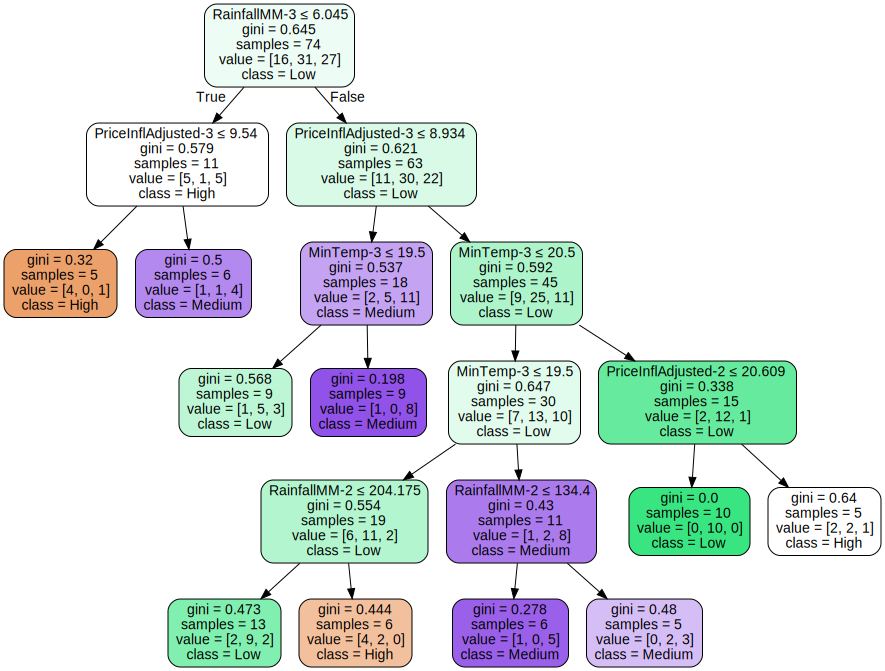

In [102]:
dot_data = tree.export_graphviz(tree1, out_file=None, 
                         feature_names=feature_names,  
                         class_names=tree1.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)  
graph

In [104]:
df_tomato_temp_joined[df_tomato_temp_joined["RainfallMM-3"] <=6.045][['PriceRange','PriceInflAdjusted-3', 'AverageTemp-2']]

,PriceRange,PriceInflAdjusted-3,AverageTemp-2
Month,,,
2009-11-01,Medium,8.278431,22.0
2010-10-01,Medium,23.243457,22.0
2010-12-01,Medium,7.521626,25.0
2011-10-01,Medium,8.396023,22.0
2011-11-01,Medium,13.861173,23.0
2012-10-01,Low,9.360995,23.0
2013-09-01,Medium,14.632734,25.0
2013-10-01,High,7.422644,23.0
2013-11-01,High,6.097952,24.0


In [92]:
df_tomato_temp_joined.index.max()

Timestamp('2017-11-01 00:00:00')

In [93]:
df_tomato_temp_joined.index.min()

Timestamp('2009-01-01 00:00:00')